In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv("train.csv")
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [50]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [51]:
print(df['Outlet_Location_Type'].value_counts())
print()
print(df['Outlet_Type'].value_counts())

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


The histogram of sales is heavily skewed towards 25% quartile range.

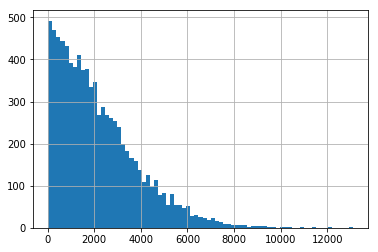

In [52]:
df['Item_Outlet_Sales'].hist(bins = 75)

Bar chart showing the mean sales of each Location Type and Outlet Type.
Tier 2 and 3 sales are nearly identical whereas Tier 1 lags slightly behind.
The supermarket Type3 has the greatest sales, followed by supermarket Type1, supermarket Type2, and Grocery Store.

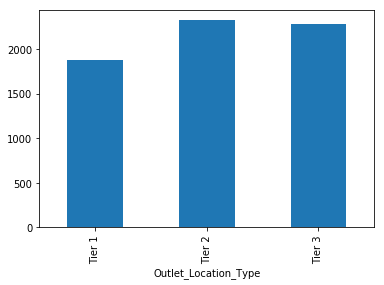

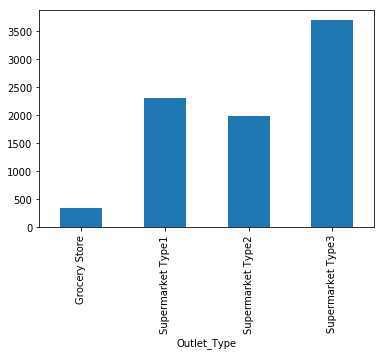

In [53]:
temp1 = df.pivot_table(values = 'Item_Outlet_Sales', index = ['Outlet_Location_Type'], aggfunc = np.mean)
#fig = plt.figure(figsize=(8,4))
temp1.plot(kind = 'bar', legend = False)

temp2 = df.pivot_table(values = 'Item_Outlet_Sales', index = ['Outlet_Type'], aggfunc = np.mean)
temp2.plot(kind='bar', legend = False)

The 'Item_Fat_Content' variable has multiple labels for 'Low Fat' and 'Regular' fat products so I've binned them together.

In [54]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [55]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

The sales of low fat and regular fat products are nearly identical

                  Item_Outlet_Sales
Item_Fat_Content                   
Low Fat                 2157.711534
Regular                 2224.561170


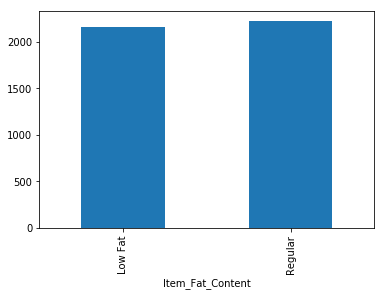

In [56]:
temp3 = df.pivot_table(values = 'Item_Outlet_Sales', index = ['Item_Fat_Content'], aggfunc = np.mean)
print(temp3)
temp3.plot(kind = 'bar', legend = False)

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


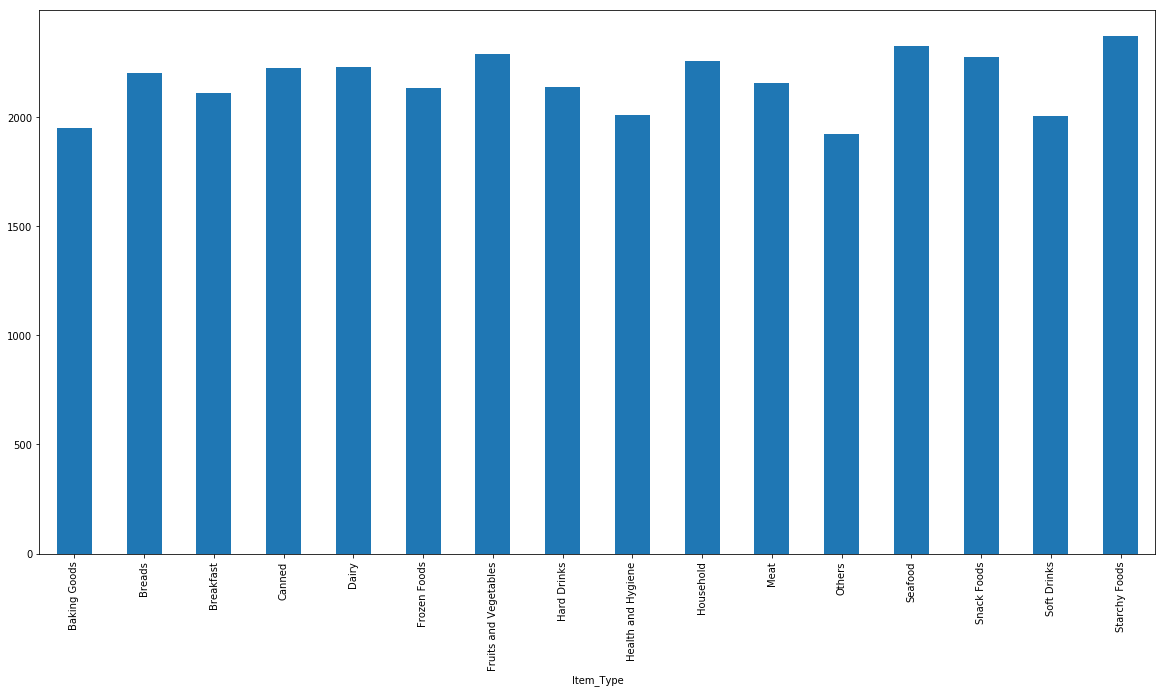

In [57]:
print(df['Item_Type'].value_counts())
temp4 = df.pivot_table(values = 'Item_Outlet_Sales', index = ['Item_Type'], aggfunc = np.mean)
temp4.plot(kind='bar',figsize=(20,10), legend = False)

There are many missing values in "Item_Weight" and "Outlet_Size"

In [58]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [59]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [60]:
mean_weights = df.pivot_table(values = 'Item_Weight', index = ['Item_Type'], aggfunc = np.mean)
mean_weights['Item_Weight']

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

The following code finds all missing values in 'Item_Weight' and replaces it with the mean of its corresponding 'Item_Type'

In [61]:
for i in range(0, len(df['Item_Type'])):
    curr_item = df.loc[i, ('Item_Type')]
    if df['Item_Weight'].isna()[i]:
        df.loc[i, ('Item_Weight')] = mean_weights['Item_Weight'][curr_item]    

In [62]:
df.apply(lambda x: sum(x.isnull()), axis = 0)

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [63]:
out_size_type = pd.crosstab(df['Outlet_Size'], 
                            columns = [df['Outlet_Type'], df['Outlet_Location_Type']])
out_size_sales = df.pivot_table(values = ['Item_Outlet_Sales'], 
                                index = ['Outlet_Size','Outlet_Location_Type'])
out_size_type

Outlet_Type          Grocery Store Supermarket Type1                \
Outlet_Location_Type        Tier 1            Tier 1 Tier 2 Tier 3   
Outlet_Size                                                          
High                             0                 0      0    932   
Medium                           0               930      0      0   
Small                          528               930    930      0   

Outlet_Type          Supermarket Type2 Supermarket Type3  
Outlet_Location_Type            Tier 3            Tier 3  
Outlet_Size                                               
High                                 0                 0  
Medium                             928               935  
Small                                0                 0

In [64]:
out_size_pivot = df.pivot_table(index = ['Outlet_Identifier'], 
                                values = ['Outlet_Size'],
                               aggfunc = lambda x: ' '.join(str(v) for v in x))

The following code fills all missing values in "Outlet_Size" according to its corresponding "Outlet_Type" and "Outlet_Location_Type"

In [65]:
small = True
for i in range(0, len(df['Outlet_Type'])):
    curr_type = df.loc[i, ('Outlet_Type')]
    curr_loc = df.loc[i, ('Outlet_Location_Type')]
    if df['Outlet_Size'].isna()[i]:
        if curr_type == 'Supermarket Type(2|3)':
            df.loc[i, ('Outlet_Size')] = 'Medium'
        else:
            if curr_loc == 'Tier2':
                df.loc[i, ('Outlet_Size')] = 'Small'
            elif curr_loc == 'Tier3':
                df.loc[i, ('Outlet_Size')] = 'High'
            elif small:
                df.loc[i, ('Outlet_Size')] = 'Small'
                small = False
            else:
                df.loc[i, ('Outlet_Size')] = 'Medium'
                small = True


In [66]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Transform all non-numeric values

In [67]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Item_Fat_Content','Item_Type', 'Outlet_Size',
          'Outlet_Location_Type', 'Outlet_Type']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [68]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30000,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92000,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50000,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20000,1,0.000000,6,182.0950,OUT010,1998,2,2,0,732.3800
4,NCD19,8.93000,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052
5,FDP36,10.39500,1,0.000000,0,51.4008,OUT018,2009,1,2,2,556.6088
6,FDO10,13.65000,1,0.012741,13,57.6588,OUT013,1987,0,2,1,343.5528
7,FDP10,12.98788,0,0.127470,13,107.7622,OUT027,1985,1,2,3,4022.7636
8,FDH17,16.20000,1,0.016687,5,96.9726,OUT045,2002,1,1,1,1076.5986
9,FDU28,19.20000,1,0.094450,5,187.8214,OUT017,2007,2,1,1,4710.5350
